In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from zipfile import ZipFile

In [3]:
def process(prop_name):
    imp_file = "FFT Spectrum.csv"
    basedir = "../data/"
    files = [f for f in os.listdir(basedir) if f.startswith(prop_name) and f.endswith(".zip")]
    files = sorted(files, key=lambda x: int(x.split("_")[1][:-5]))
    print(files)

    amps = []
    freqs = None
    currents = []
    for file in files:
        current = float(file.split("_")[1][:-5])
        currents.append(current)
        with ZipFile(f"{basedir}/{file}") as zf:
            with zf.open(imp_file) as f:
                data = pd.read_csv(f, names=["frequency", "amplitude"], skiprows=1)
        assert freqs is None or (freqs == data["frequency"].to_numpy()).all(), "frequencies do not match"
        freqs = data["frequency"].to_numpy()
        amp = data["amplitude"].to_numpy()
        amps.append(amp)

    return freqs, np.array(amps), currents

def average_over_interval(arr, p):
    shape = arr.shape
    new_shape = (shape[0], int(shape[1] / p))
    arr_reshaped = arr[:, :new_shape[1]*p].reshape(shape[0], new_shape[1], p)
    averaged_arr = np.mean(arr_reshaped, axis=2)
    return averaged_arr

['prop0_1a.zip', 'prop0_2a.zip', 'prop0_3a.zip', 'prop0_4a.zip', 'prop0_6a.zip', 'prop0_9a.zip']


Text(0, 0.5, 'Amplitude')

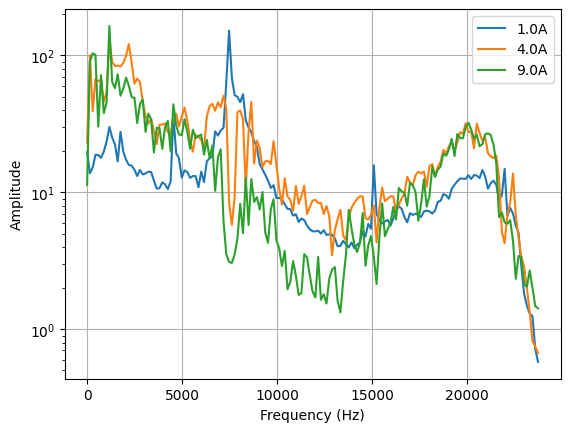

In [4]:
freqs0, amps0, currents0 = process("prop0")

p = 100
amps0 = average_over_interval(amps0, p)
freqs0 = freqs0[::p][:-1]


plt.plot(freqs0, amps0[0], label=f"{currents0[0]}A")
# plt.plot(freqs0, amps0[1], label=f"{currents0[1]}A")
# plt.plot(freqs0, amps0[2], label=f"{currents0[2]}A")
plt.plot(freqs0, amps0[3], label=f"{currents0[3]}A")
# plt.plot(freqs0, amps0[4], label=f"{currents0[4]}A")
plt.plot(freqs0, amps0[5], label=f"{currents0[5]}A")

plt.legend()
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.yscale("log")
plt.ylabel("Amplitude")

['prop4_1a.zip', 'prop4_2a.zip', 'prop4_3a.zip', 'prop4_4a.zip', 'prop4_6a.zip', 'prop4_9a.zip']


Text(0, 0.5, 'Amplitude')

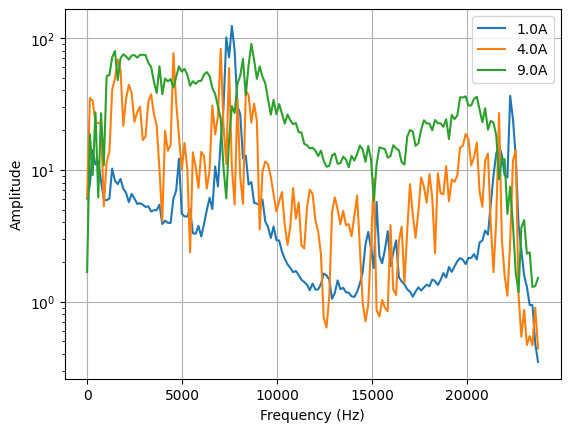

In [5]:
freqs4, amps4, currents4 = process("prop4")

p = 100
amps4 = average_over_interval(amps4, p)
freqs4 = freqs4[::p][:-1]


plt.plot(freqs4, amps4[0], label=f"{currents4[0]}A")
# plt.plot(freqs4, amps4[1], label=f"{currents4[1]}A")
# plt.plot(freqs4, amps4[2], label=f"{currents4[2]}A")
plt.plot(freqs4, amps4[3], label=f"{currents4[3]}A")
# plt.plot(freqs4, amps4[4], label=f"{currents4[4]}A")
plt.plot(freqs4, amps4[5], label=f"{currents4[5]}A")

plt.legend()
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.yscale("log")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

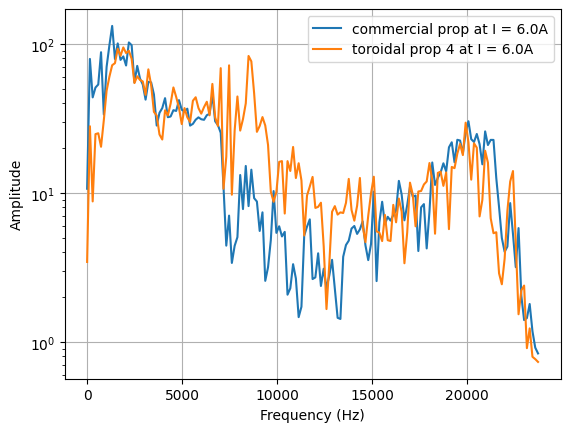

In [6]:
i = 4
plt.plot(freqs0, amps0[i], label=f"commercial prop at I = {currents0[i]}A")
plt.plot(freqs4, amps4[i], label=f"toroidal prop 4 at I = {currents4[i]}A")

plt.legend()
plt.grid()
plt.xlabel("Frequency (Hz)")
plt.yscale("log")
plt.ylabel("Amplitude")

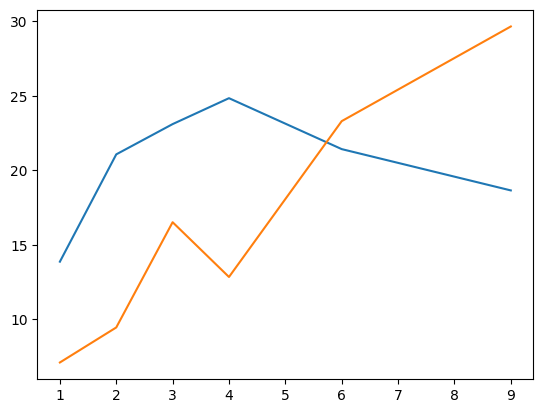

In [7]:
sound0 = np.mean(amps0, axis = 1)
sound4 = np.mean(amps4, axis = 1)
plt.plot(currents0, sound0, label="Sound")
plt.plot(currents4, sound4, label="Sound")